In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Smartphones_price.csv')

In [3]:
df.head()

,Brand,Released Year,OS,Display (inches),Display (pixels),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,"6.3""",1080x2340,2.1MP,1080,6GB,10000mAh,"৳18,000.00"
1,Ulefone,2021,Android 11,"6.52""",1080x2400,20MP,2160,4GB,10000mAh,"৳16,000.00"
2,Oukitel,2023,Android 13,"6.58""",1080x2408,48MP,2160,16GB,10000mAh,"৳35,000.00"
3,Oukitel,2023,Android 13,"6.58""",1080x2408,48MP,2160,8GB,10000mAh,"৳35,000.00"
4,ZTE,2023,Android 13,"12.1""",1600x2560,13MP,1080,16GB,10000mAh,"৳60,000.00"


In [4]:
df.shape

(3338, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              3338 non-null   object
 1   Released Year      3338 non-null   object
 2   OS                 3338 non-null   object
 3   Display (inches)   3338 non-null   object
 4   Display (pixels)   3338 non-null   object
 5   Camera             3337 non-null   object
 6   Camera Resolution  3338 non-null   int64 
 7   RAM                3338 non-null   object
 8   Battery Capacity   3338 non-null   object
 9   Price              3338 non-null   object
dtypes: int64(1), object(9)
memory usage: 260.9+ KB


In [6]:
df.duplicated().sum()

61

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

### Data Preprocessing

In [9]:
df['Price'] = df['Price'].str.replace('৳','')

In [10]:
# Remove commas from the Price column
df['Price'] = df['Price'].str.replace(',', '')

# Convert the column to float
df['Price'] = df['Price'].astype(float)

In [11]:
df.head()

,Brand,Released Year,OS,Display (inches),Display (pixels),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,"6.3""",1080x2340,2.1MP,1080,6GB,10000mAh,18000.0
1,Ulefone,2021,Android 11,"6.52""",1080x2400,20MP,2160,4GB,10000mAh,16000.0
2,Oukitel,2023,Android 13,"6.58""",1080x2408,48MP,2160,16GB,10000mAh,35000.0
3,Oukitel,2023,Android 13,"6.58""",1080x2408,48MP,2160,8GB,10000mAh,35000.0
4,ZTE,2023,Android 13,"12.1""",1600x2560,13MP,1080,16GB,10000mAh,60000.0


In [12]:
df['RAM'] = df['RAM'].str.replace('GB','')

In [13]:
df['RAM'] = df['RAM'].astype('float32')

In [14]:
df.head()

,Brand,Released Year,OS,Display (inches),Display (pixels),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,"6.3""",1080x2340,2.1MP,1080,6.0,10000mAh,18000.0
1,Ulefone,2021,Android 11,"6.52""",1080x2400,20MP,2160,4.0,10000mAh,16000.0
2,Oukitel,2023,Android 13,"6.58""",1080x2408,48MP,2160,16.0,10000mAh,35000.0
3,Oukitel,2023,Android 13,"6.58""",1080x2408,48MP,2160,8.0,10000mAh,35000.0
4,ZTE,2023,Android 13,"12.1""",1600x2560,13MP,1080,16.0,10000mAh,60000.0


In [15]:
df['Camera'] = df['Camera'].str.replace('MP','')

In [16]:
df['Camera'] = df['Camera'].astype('float32')

In [17]:
df.head()

,Brand,Released Year,OS,Display (inches),Display (pixels),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,"6.3""",1080x2340,2.1,1080,6.0,10000mAh,18000.0
1,Ulefone,2021,Android 11,"6.52""",1080x2400,20.0,2160,4.0,10000mAh,16000.0
2,Oukitel,2023,Android 13,"6.58""",1080x2408,48.0,2160,16.0,10000mAh,35000.0
3,Oukitel,2023,Android 13,"6.58""",1080x2408,48.0,2160,8.0,10000mAh,35000.0
4,ZTE,2023,Android 13,"12.1""",1600x2560,13.0,1080,16.0,10000mAh,60000.0


In [18]:
df['Battery Capacity'] = df['Battery Capacity'].str.replace('mAh','')

In [19]:
df['Battery Capacity'] = df['Battery Capacity'].astype('int32')

In [20]:
df.head()

,Brand,Released Year,OS,Display (inches),Display (pixels),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,"6.3""",1080x2340,2.1,1080,6.0,10000,18000.0
1,Ulefone,2021,Android 11,"6.52""",1080x2400,20.0,2160,4.0,10000,16000.0
2,Oukitel,2023,Android 13,"6.58""",1080x2408,48.0,2160,16.0,10000,35000.0
3,Oukitel,2023,Android 13,"6.58""",1080x2408,48.0,2160,8.0,10000,35000.0
4,ZTE,2023,Android 13,"12.1""",1600x2560,13.0,1080,16.0,10000,60000.0


In [21]:
df['Display (inches)'] = df['Display (inches)'].str.replace('[^\d.]', '', regex=True)

In [22]:
df['Display (inches)'] = df['Display (inches)'].astype('float32')

In [23]:
df.head()

,Brand,Released Year,OS,Display (inches),Display (pixels),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,6.30,1080x2340,2.1,1080,6.0,10000,18000.0
1,Ulefone,2021,Android 11,6.52,1080x2400,20.0,2160,4.0,10000,16000.0
2,Oukitel,2023,Android 13,6.58,1080x2408,48.0,2160,16.0,10000,35000.0
3,Oukitel,2023,Android 13,6.58,1080x2408,48.0,2160,8.0,10000,35000.0
4,ZTE,2023,Android 13,12.10,1600x2560,13.0,1080,16.0,10000,60000.0


In [24]:
df.drop(columns=['Display (pixels)'],inplace=True)

In [25]:
df.head()

,Brand,Released Year,OS,Display (inches),Camera,Camera Resolution,RAM,Battery Capacity,Price
0,Doogee,2020,Android 10,6.30,2.1,1080,6.0,10000,18000.0
1,Ulefone,2021,Android 11,6.52,20.0,2160,4.0,10000,16000.0
2,Oukitel,2023,Android 13,6.58,48.0,2160,16.0,10000,35000.0
3,Oukitel,2023,Android 13,6.58,48.0,2160,8.0,10000,35000.0
4,ZTE,2023,Android 13,12.10,13.0,1080,16.0,10000,60000.0


In [26]:
df.shape

(3277, 9)

In [27]:
# Remove leading and trailing whitespaces from the 'Released Date' column
df['Released Year'] = df['Released Year'].str.strip()

In [28]:
df['Released Year'] = df['Released Year'].replace('', np.nan)

In [29]:
df['Released Year'] = df['Released Year'].fillna(0)

In [30]:
df['Released Year'] = df['Released Year'].astype('int32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3277 entries, 0 to 3337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              3277 non-null   object 
 1   Released Year      3277 non-null   int32  
 2   OS                 3277 non-null   object 
 3   Display (inches)   3277 non-null   float32
 4   Camera             3276 non-null   float32
 5   Camera Resolution  3277 non-null   int64  
 6   RAM                3277 non-null   float32
 7   Battery Capacity   3277 non-null   int32  
 8   Price              3277 non-null   float64
dtypes: float32(3), float64(1), int32(2), int64(1), object(2)
memory usage: 192.0+ KB


In [32]:
df.isnull().sum()

Brand                0
Released Year        0
OS                   0
Display (inches)     0
Camera               1
Camera Resolution    0
RAM                  0
Battery Capacity     0
Price                0
dtype: int64

In [33]:
# Drop rows with null values in specified column 'Camera'
df.dropna(subset=['Camera'], inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)


In [34]:
df.isnull().sum()

Brand                0
Released Year        0
OS                   0
Display (inches)     0
Camera               0
Camera Resolution    0
RAM                  0
Battery Capacity     0
Price                0
dtype: int64

<Axes: xlabel='Price', ylabel='Density'>

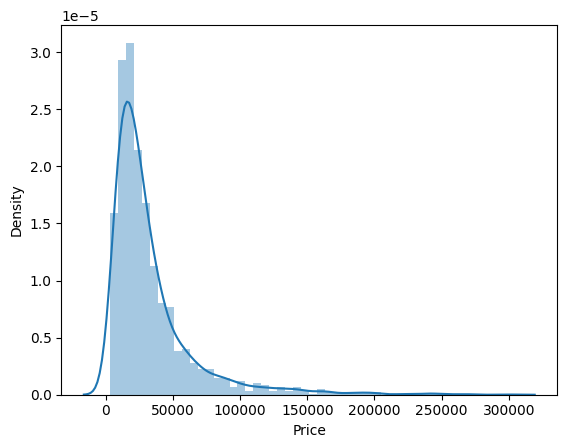

In [35]:
sns.distplot(df['Price'])

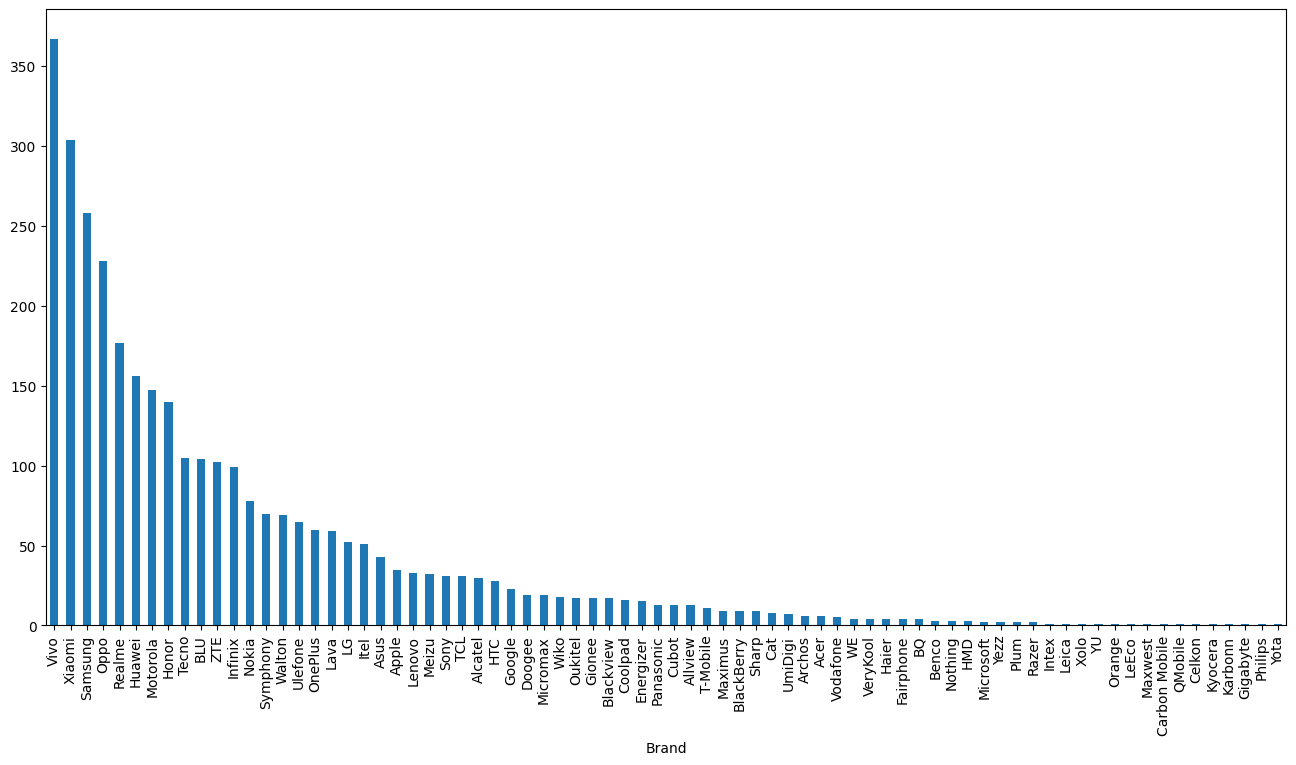

In [36]:
plt.figure(figsize=(16, 8))

# Plot the bar graph
df['Brand'].value_counts().plot(kind='bar')

# Show the plot
plt.show()

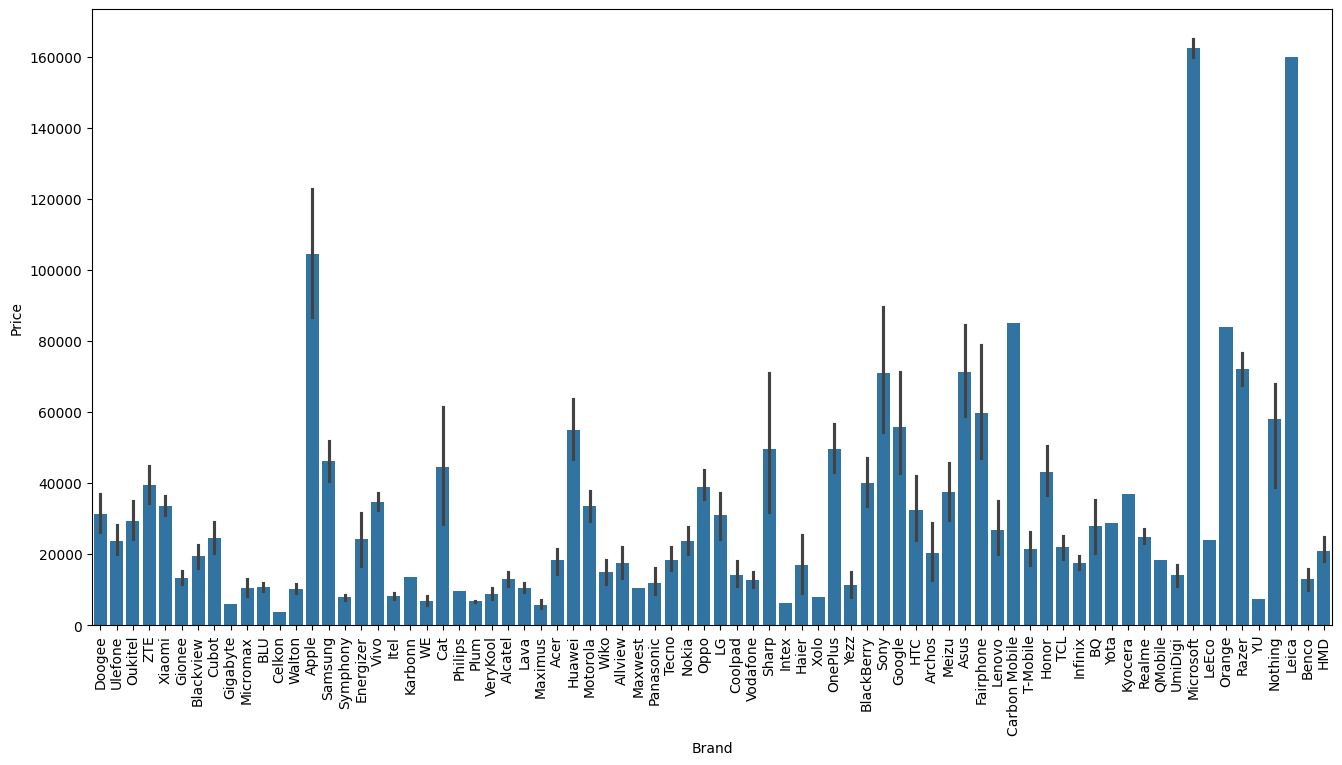

In [37]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df['Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

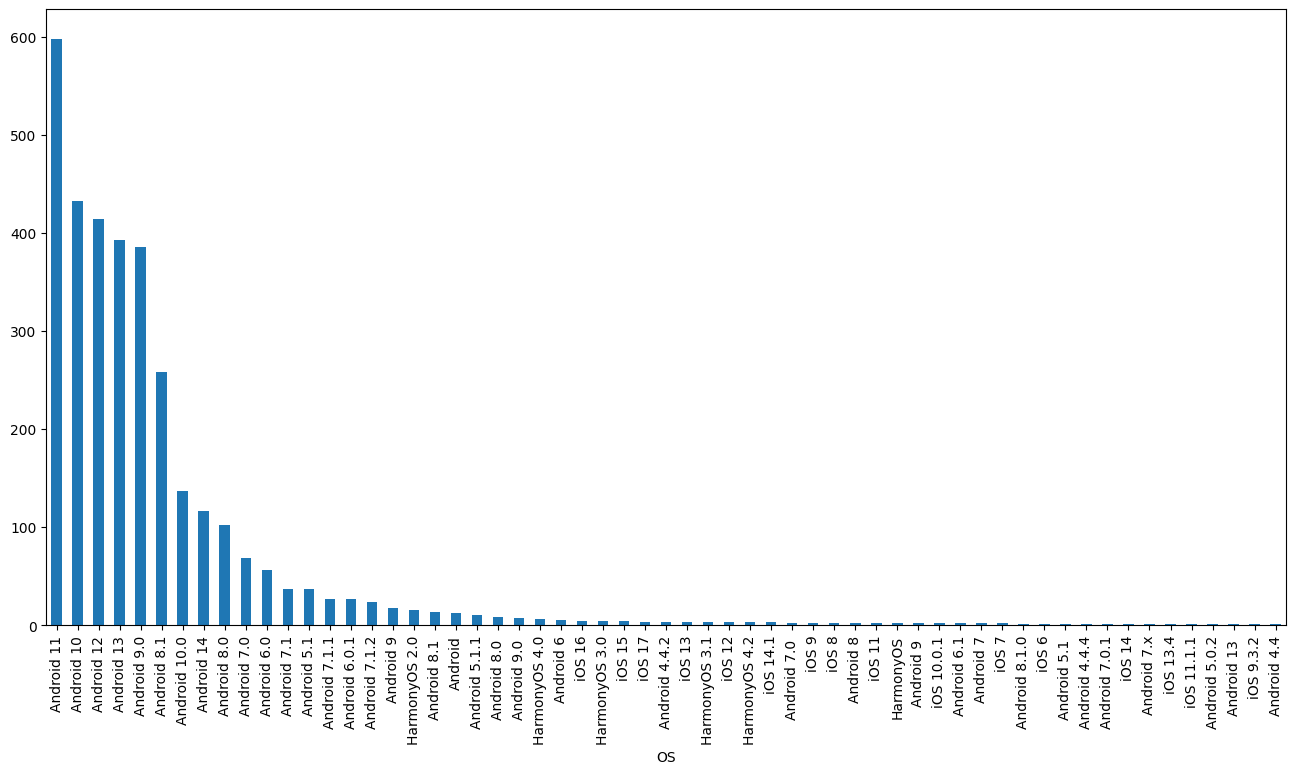

In [38]:
plt.figure(figsize=(16, 8))
df['OS'].value_counts().plot(kind='bar')
plt.show()

In [39]:
df['OS'] = df['OS'].replace('Android 10.0', 'Android 10')
df['OS'] = df['OS'].replace('Android 9.0', 'Android 9')
df['OS'] = df['OS'].replace('Android 8.0', 'Android 8.1')
df['OS'] = df['OS'].replace('Android 7.1.1', 'Android 7.0')
df['OS'] = df['OS'].replace('Android 5.1.1', 'Android 5.1')
df['OS'] = df['OS'].replace('Android 7.1', 'Android 7.0')
df['OS'] = df['OS'].replace('Android 7.1.2', 'Android 7.0')
df['OS'] = df['OS'].replace('Android 6', 'Android 6.0')
df['OS'] = df['OS'].replace('Android 6.0.1', 'Android 6.0')
df['OS'] = df['OS'].replace('Android 8.1 ', 'Android 8.1')
df['OS'] = df['OS'].replace('Android 8.0 ', 'Android 8.1')

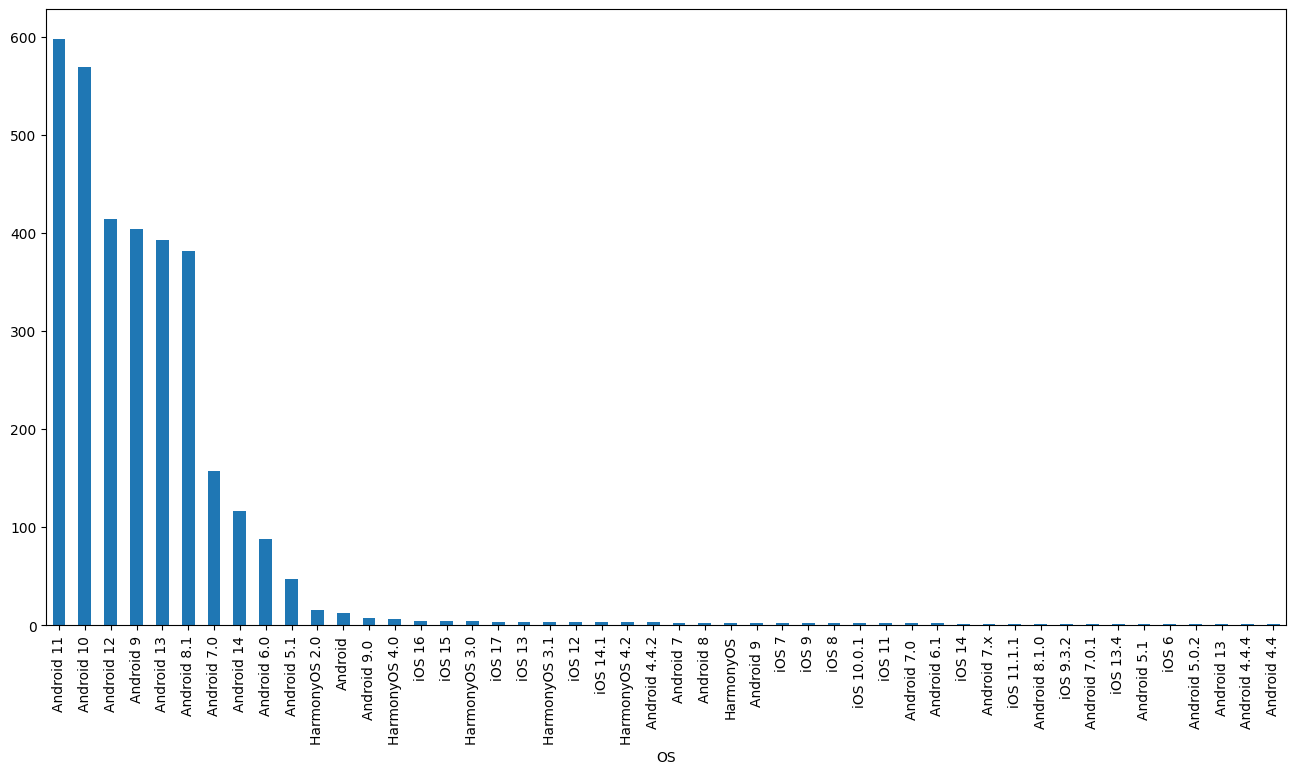

In [40]:
plt.figure(figsize=(16, 8))
df['OS'].value_counts().plot(kind='bar')
plt.show()

In [41]:
def fetch_os(text):
    if text == 'Android 11' or text == 'Android 10' or text == 'Android 12'  or text == 'Android 9' or text == 'Android 13'  or text == 'Android 8.1' or text == 'Android 14'   or text == 'Android 7.0'  or text == 'Android 6.0' or text == 'Android 5.1'  :
        return text
    else:
        if text.split()[0] == 'Android':
            return 'Other Android OS'
        elif text.split()[0] == 'iOS':
            return 'iOS'
        else:
            return 'HarmonyOS'

In [42]:
df['OS'] = df['OS'].apply(fetch_os)

In [43]:
df.tail()

,Brand,Released Year,OS,Display (inches),Camera,Camera Resolution,RAM,Battery Capacity,Price
3271,Ulefone,2023,Android 13,6.58,64.0,2160,8.0,9600,25000.0
3272,Ulefone,2022,Android 12,5.93,16.0,1080,4.0,9600,25000.0
3273,Ulefone,2024,Android 13,5.93,50.0,1080,8.0,9600,30000.0
3274,Oukitel,2023,Android 13,6.78,64.0,1080,12.0,9800,55000.0
3275,Oukitel,2022,Android 12,6.78,64.0,1080,12.0,9800,30000.0


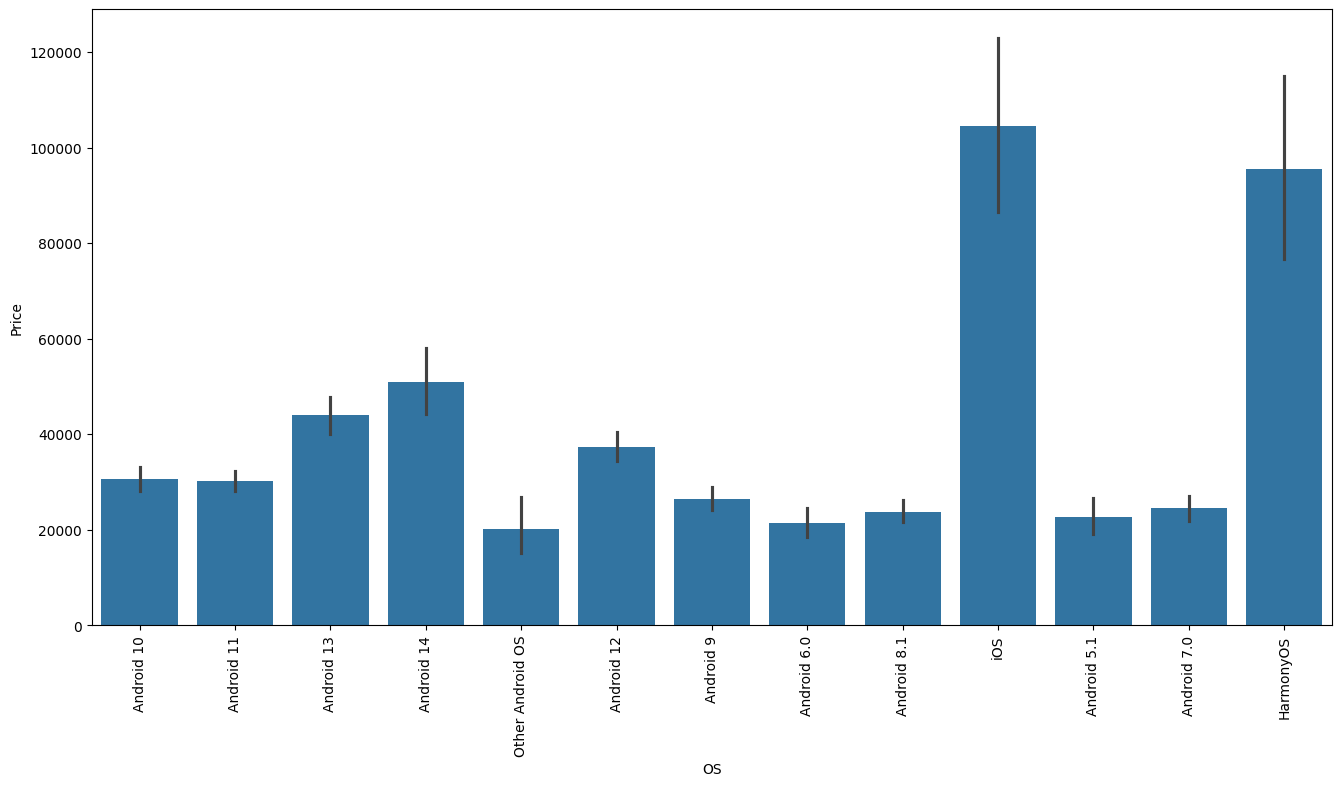

In [44]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Data Splitting

In [45]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [46]:
y

0        9.798127
1        9.680344
2       10.463103
3       10.463103
4       11.002100
          ...    
3271    10.126631
3272    10.126631
3273    10.308953
3274    10.915088
3275    10.308953
Name: Price, Length: 3276, dtype: float64

In [47]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.15,random_state=2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              3276 non-null   object 
 1   Released Year      3276 non-null   int32  
 2   OS                 3276 non-null   object 
 3   Display (inches)   3276 non-null   float32
 4   Camera             3276 non-null   float32
 5   Camera Resolution  3276 non-null   int64  
 6   RAM                3276 non-null   float32
 7   Battery Capacity   3276 non-null   int32  
 8   Price              3276 non-null   float64
dtypes: float32(3), float64(1), int32(2), int64(1), object(2)
memory usage: 166.5+ KB


## Linear Regression

In [49]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')

# Define the Linear Regression model
step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(x_train, y_train)

# Predict
y_pred = pipe.predict(x_test)

# Evaluate
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8134933677049182
MAE: 0.24511045888474806


### Ridge Regression

In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = Ridge(alpha=0.0001)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)

# Evaluate
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.813493108033909
MAE: 0.24511076121157135


## Lasso Regression

In [51]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = Lasso(alpha=0.001)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7997549315886551
MAE: 0.25268605572939945


## KNN

In [52]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = KNeighborsRegressor(n_neighbors=3)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7378144164954257
MAE: 0.28457406867477775


## Decision Tree

In [53]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = DecisionTreeRegressor(max_depth=8)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7606892727604608
MAE: 0.28328954564418146


## SVM

In [54]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.758805874158935
MAE: 0.2879215710274502


## Random Forest

In [55]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8395048420440743
MAE: 0.22443242694482637


## ExtraTrees

In [56]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8386681681850557
MAE: 0.22955754640336531


## AdaBoost

In [57]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7291207186199491
MAE: 0.32031756183119786


## Gradient Boost

In [58]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 2])
], remainder='passthrough')


step2 = GradientBoostingRegressor(n_estimators=500)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(x_train, y_train)


y_pred = pipe.predict(x_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.869373376972064
MAE: 0.2084892906087002


## Exporting the Model

In [59]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))